<a href="https://colab.research.google.com/github/epjonnadula/Deep-Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
import seaborn as sns

In [0]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
x=bos.RM
y=boston.target
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)
x=x/np.mean(x)
y=y/np.mean(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3,shuffle=True)
m=np.shape(train_x)[0]
train_x=np.nan_to_num(train_x)
train_y=np.nan_to_num(train_y)
ones=np.ones((m,1))
train_x=np.append(ones,train_x,axis=1)
n=np.shape(train_x)[1]

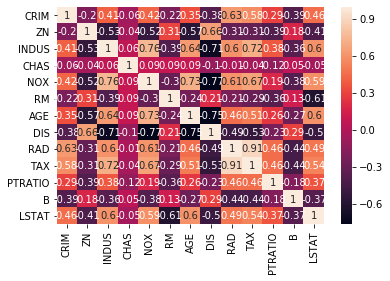

In [3]:
correlation_matrix = bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [0]:
def hypothesis(theta,x):
    return np.matmul(x,theta)

In [0]:
def cost(calculated,actual):
    diff=np.subtract(calculated,actual)
    val=np.matmul(np.transpose(diff),diff)[0][0]
    val=val/(2*m)
    return val

In [0]:
def gradient_descent(calculated,actual,x,alpha,theta):
    diff=np.subtract(calculated,actual)
    grad=np.matmul(np.transpose(diff),x)
    grads=alpha*(np.transpose(grad)/np.shape(x)[0])
    theta=np.subtract(theta,grads)
    return theta

In [7]:
prev_cost=sys.maxsize
cost_list=[]
epsilon=0.00000001
theta=np.zeros((n,1))
while True:
    calculated=hypothesis(theta,train_x)
    cost_val=cost(calculated,train_y)
    theta=gradient_descent(calculated,train_y,train_x,0.001,theta)
    cost_list.append(cost_val)
    if np.abs(cost_val-prev_cost)<=epsilon:
        break
    else:
        prev_cost=cost_val
    if len(cost_list)%10000==0:
        print("Iteration ",len(cost_list), "---> Cost ",cost_list[-1])

Iteration  10000 ---> Cost  0.06859759392443115
Iteration  20000 ---> Cost  0.06546322605108605
Iteration  30000 ---> Cost  0.06271174700978002
Iteration  40000 ---> Cost  0.060296383778447996
Iteration  50000 ---> Cost  0.05817607704461878
Iteration  60000 ---> Cost  0.056314783228764105
Iteration  70000 ---> Cost  0.05468086177123888
Iteration  80000 ---> Cost  0.053246537267164995
Iteration  90000 ---> Cost  0.051987427305966005
Iteration  100000 ---> Cost  0.05088212798918814
Iteration  110000 ---> Cost  0.049911850080731235
Iteration  120000 ---> Cost  0.04906009960432273
Iteration  130000 ---> Cost  0.04831239745863958
Iteration  140000 ---> Cost  0.047656033283750523
Iteration  150000 ---> Cost  0.04707984939479817
Iteration  160000 ---> Cost  0.046574051109959776
Iteration  170000 ---> Cost  0.046130040248408964
Iteration  180000 ---> Cost  0.045740268967871436
Iteration  190000 ---> Cost  0.04539811145712673
Iteration  200000 ---> Cost  0.0450977513023263
Iteration  210000 ---

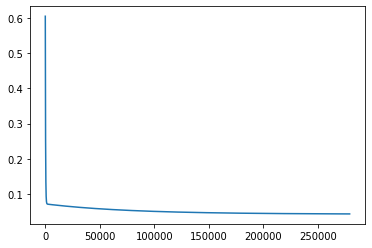

Training Cost= 0.04370684738039114


In [8]:
plt.plot(range(0,len(cost_list)),cost_list)
plt.show()
print("Training Cost=",cost_list[-1])

In [0]:
m=np.shape(test_x)[0]
test_x=np.nan_to_num(test_x)
test_y=np.nan_to_num(test_y)
ones=np.ones((m,1))
test_x=np.append(ones,test_x,axis=1)
n=np.shape(test_x)[1]

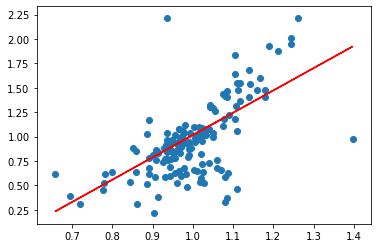

Test Cost= 0.04288522131110131


In [10]:
calculated=hypothesis(theta,test_x)
plt.scatter(test_x[:,-1],test_y)
plt.plot(test_x[:,-1],calculated,color='red')
plt.show()
cost_val=cost(calculated,test_y)
print("Test Cost=",cost_val)

In [11]:
reg = LinearRegression()
reg.fit(train_x, train_y)
predict_y = reg.predict(test_x)

print("Testing Cost",cost(predict_y,test_y))

Testing Cost 0.04336476558561342
